<a href="https://colab.research.google.com/github/sgevatschnaider/Grafos/blob/main/Graph_convolution_network_con_SBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, HTML

# Crear una cadena HTML con la explicación
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Aplicación de Graph Convolutional Network (GCN)</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            background-color: #f4f4f4;
            margin: 20px;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1, h2, h3 {
            color: #333;
        }
        p {
            margin: 10px 0;
        }
        code {
            background-color: #eef;
            padding: 2px 4px;
            border-radius: 4px;
            font-family: "Courier New", Courier, monospace;
        }
        .highlight {
            background-color: #ffeb3b;
        }
    </style>
</head>
<body>
    <h1>Aplicación de Graph Convolutional Network (GCN)</h1>
    <h2>¿Qué es una GCN?</h2>
    <p>
        Una <strong>Graph Convolutional Network (GCN)</strong> es un tipo de red neuronal profunda diseñada específicamente para operar sobre datos que tienen una estructura de grafo. A diferencia de las redes neuronales tradicionales, que funcionan con datos tabulares o imágenes, las GCNs están diseñadas para capturar las relaciones y la topología inherente de los grafos. Esto las hace particularmente útiles en aplicaciones donde las conexiones entre datos son tan importantes como los datos mismos, como en redes sociales, sistemas de recomendación, y biología computacional.
    </p>
    <h2>Objetivo del Código</h2>
    <p>
        El objetivo del código presentado es <span class="highlight">demostrar cómo se puede aplicar una GCN para detectar comunidades</span> dentro de un grafo. En este caso, se utiliza un grafo generado artificialmente mediante el modelo Stochastic Block Model (SBM), que crea comunidades bien definidas con alta cohesión interna y baja cohesión externa.
    </p>
    <p>
        El código se enfoca en:
    </p>
    <ul>
        <li>Generar un grafo con el modelo SBM, que crea grupos o comunidades de nodos.</li>
        <li>Asignar características simples a cada nodo, como su grado y centralidad.</li>
        <li>Entrenar una GCN para clasificar los nodos en sus respectivas comunidades.</li>
        <li>Visualizar tanto el grafo original como las predicciones de la GCN, mostrando cómo el modelo ha identificado correctamente las comunidades.</li>
    </ul>
    <h2>Aplicación Práctica</h2>
    <p>
        Este tipo de modelo tiene aplicaciones prácticas en áreas como:
    </p>
    <ul>
        <li><strong>Redes sociales:</strong> Detectar grupos de usuarios con intereses o comportamientos similares.</li>
        <li><strong>Biología computacional:</strong> Identificar módulos funcionales en redes de proteínas o genes.</li>
        <li><strong>Sistemas de recomendación:</strong> Agrupar productos o usuarios para mejorar las recomendaciones.</li>
        <li><strong>Análisis de infraestructuras:</strong> Detectar comunidades en redes de transporte o energía para optimizar el flujo y la resiliencia.</li>
    </ul>
    <p>
        En este ejemplo, al aplicar la GCN al grafo generado, el objetivo es que el modelo aprenda las características de cada comunidad y sea capaz de agrupar correctamente los nodos, reflejando las comunidades originales generadas por el SBM.
    </p>
</body>
</html>
"""

# Mostrar el contenido HTML en Google Colab
display(HTML(html_content))


Epoch 0, Loss: 3.1659, Test Accuracy: 0.3000
Epoch 10, Loss: 0.9640, Test Accuracy: 0.4125
Epoch 20, Loss: 1.1436, Test Accuracy: 0.7000
Epoch 30, Loss: 1.1539, Test Accuracy: 0.4125
Epoch 40, Loss: 1.0704, Test Accuracy: 0.4125
Epoch 50, Loss: 1.0003, Test Accuracy: 0.4125
Epoch 60, Loss: 1.0954, Test Accuracy: 0.7000
Epoch 70, Loss: 1.0115, Test Accuracy: 0.4125
Epoch 80, Loss: 1.0471, Test Accuracy: 0.4125
Epoch 90, Loss: 1.0874, Test Accuracy: 0.4125
Epoch 100, Loss: 1.1227, Test Accuracy: 0.4125
Epoch 110, Loss: 0.9971, Test Accuracy: 0.4125
Epoch 120, Loss: 1.0446, Test Accuracy: 0.4125
Epoch 130, Loss: 0.9141, Test Accuracy: 0.4125
Epoch 140, Loss: 0.9894, Test Accuracy: 0.4125
Epoch 150, Loss: 1.0798, Test Accuracy: 0.4125
Epoch 160, Loss: 0.9104, Test Accuracy: 0.6750
Epoch 170, Loss: 0.9670, Test Accuracy: 0.5500
Epoch 180, Loss: 0.9123, Test Accuracy: 0.7000
Epoch 190, Loss: 1.0723, Test Accuracy: 0.4125
Predicciones de clases para cada nodo: tensor([2, 2, 2, 2, 2, 2, 2, 2, 

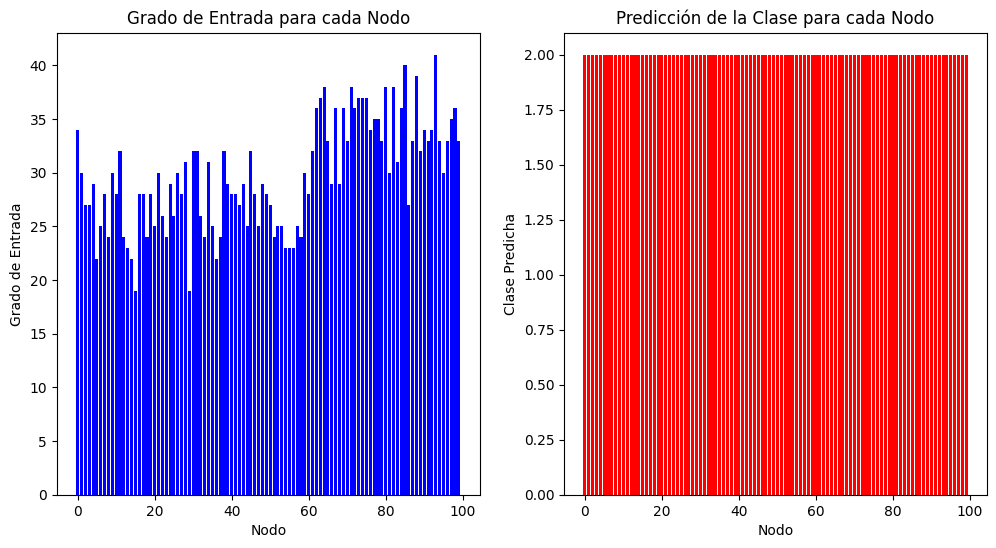

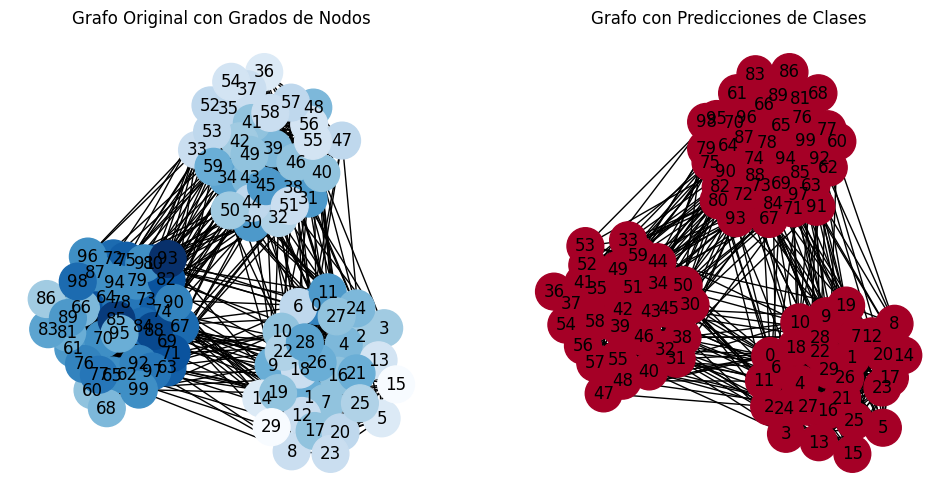

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx
import numpy as np

# Generar un grafo usando el Stochastic Block Model (SBM)
n = 100  # Número total de nodos
sizes = [30, 30, 40]  # Tamaño de cada comunidad
p_intra = 0.8  # Probabilidad de conexión dentro de las comunidades
p_inter = 0.05  # Probabilidad de conexión entre comunidades
probs = np.array([
    [p_intra, p_inter, p_inter],
    [p_inter, p_intra, p_inter],
    [p_inter, p_inter, p_intra]
])

G = nx.stochastic_block_model(sizes, probs)

# Convertir el grafo de networkx a un formato que torch_geometric puede usar
data = from_networkx(G)

# Agregar características adicionales a los nodos (por ejemplo, grado y centralidad)
degree = torch.tensor([[G.degree(i)] for i in range(G.number_of_nodes())], dtype=torch.float)
closeness = torch.tensor([[nx.closeness_centrality(G, i)] for i in range(G.number_of_nodes())], dtype=torch.float)
data.x = torch.cat([degree, closeness], dim=1)

# Agregar etiquetas de nodos (comunidades) basadas en las comunidades generadas por SBM
labels = []
for i, size in enumerate(sizes):
    labels += [i] * size
labels = torch.tensor(labels, dtype=torch.long)
data.y = labels

# Dividir nodos en entrenamiento y test de manera aleatoria
indices = torch.randperm(data.num_nodes)
train_indices = indices[:int(data.num_nodes * 0.8)]
test_indices = indices[int(data.num_nodes * 0.2):]

train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
data.train_mask = train_mask

test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask[test_indices] = True
data.test_mask = test_mask

# Modelo de Red Convolucional de Grafos (GCN)
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, hidden_dim)
        self.conv4 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        x = self.conv4(x, edge_index)
        return F.log_softmax(x, dim=1)

# Inicializar modelo, optimizador y criterio de pérdida
input_dim = data.x.shape[1]
hidden_dim = 32  # Aumentar el número de unidades ocultas
output_dim = len(sizes)  # Tres clases (una por cada comunidad)
model = GCN(input_dim, hidden_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # Disminuir la tasa de aprendizaje
criterion = nn.CrossEntropyLoss()

# Entrenamiento del modelo
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluación del modelo
def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask] == data.y[data.test_mask]
    accuracy = correct.sum().item() / data.test_mask.sum().item()
    return accuracy

# Ciclo de entrenamiento
epochs = 200
for epoch in range(epochs):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Salida final de las predicciones
model.eval()
out = model(data)
pred = out.argmax(dim=1)
print(f'Predicciones de clases para cada nodo: {pred}')

# Visualización de los grados y las predicciones
node_degree = [G.degree(i) for i in range(G.number_of_nodes())]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(G.number_of_nodes()), node_degree, color='blue')
plt.title('Grado de Entrada para cada Nodo')
plt.xlabel('Nodo')
plt.ylabel('Grado de Entrada')

plt.subplot(1, 2, 2)
plt.bar(range(G.number_of_nodes()), pred.tolist(), color='red')
plt.title('Predicción de la Clase para cada Nodo')
plt.xlabel('Nodo')
plt.ylabel('Clase Predicha')

plt.show()

# Visualización del grafo original con los grados de los nodos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color=node_degree, cmap=plt.cm.Blues, node_size=700, font_size=12)
plt.title("Grafo Original con Grados de Nodos")

# Visualización del grafo con las predicciones de clases
plt.subplot(1, 2, 2)
nx.draw(G, with_labels=True, node_color=pred.tolist(), cmap=plt.cm.RdYlBu, node_size=700, font_size=12)
plt.title("Grafo con Predicciones de Clases")

plt.show()
